# **Loan Eligibility Prediction**<B>
![](data/title_image.png)<B>
* This research predicts whether the loan applicants should be approved or rejected using logistic regression and Random Forest Clasifier models<b>
* Six Models were created using different techniques: Reccursive Feature Elimination, Upsampling, Downsampling, and Class Weight<b>
* The models' performance was evaluated with AUC, accuracy, precision, recall<b>  
* Logistic Regression with hyparparameters and RFE selected features is the recommended model with accuracy rate of 85.06%, specificity of 62.5%

* The data contains 614 observations and 13 features<b>
* 'Loan_Status' is the target variable that contains 'Y' and 'N'<b>

<h2><b>Top</b></h2>
<li><a href="#Import-modules">Import modules</a></li>
<li><a href="#Load-data">Load data</a></li>
<li><a href="#Basic-statistics">Basic statistics</a></li>
<li><a href="#Exploratory-Data-Analysis">Exploratory Data Analysis</a></li>
<li><a href="#Feature-Engineering">Feature Engineering</a></li>
<li><a href="#Data-preprocessing">Data preprocessing</a></li>
<li><a href="#Finalize-Dataset">Finalize Dataset</a></li>
<li><a href="#Feature-Selection-Using-RFE-(Recursive-Feature-Elimination)">Feature Selection Using RFE (Recursive Feature Elimination)</a></li>
<li><a href="#Model-Creation">Model Creation</a></li>
<li><a href="#Model-Performance">Model Performance</a></li>
<li><a href="#Conclusion">Conclusion</a></li>

<h2><b>Import modules</b></h2>
<a href="#Top"><h5>Top</h5></a>

In [86]:
#### Import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [87]:
# Set pd.options to add slide bars
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [88]:
# Set default title color
plt.style.use('fivethirtyeight')
plt.rcParams.update({'text.color': "#333333", 
                     'axes.labelcolor': "#333333", 'axes.labelweight': 'bold'})

<h2><b>Load data</h2></b>
<a href="#Top"><h5>Top</h5></a>

In [89]:
df = pd.read_csv("C:/Users/cutey/OneDrive/Documents/2_credit_card_default_prediction/data/Loan_data.csv")

In [90]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<h2><b>Basic Statistics</h2></b>

* The dataset contains 614 observations and 13 variables
* The dataset has 5 numerical variables and 7 categorical variables
* 'Loan_ID' is a unique ID for each observation, thus it will be removed
* 'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term' and 'Credit_History' have null values 
* 'ApplicantIncome' and 'LoanAmount' are heavily right skewed<b>  
<a href="#Top"><h5>Top</h5></a>

In [91]:
df.shape

(614, 13)

In [92]:
df.describe(include=np.object).T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [93]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [95]:
# Check missing values
round(df.isnull().sum()/len(df)*100, 2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [96]:
# Remove Loan_ID
df.drop('Loan_ID', axis=1, inplace=True)

In [97]:
# Check columns
cols = df.columns
categorical_cols = df.select_dtypes('object').columns.tolist()
numerical_cols = [col for col in cols if col not in categorical_cols]

print("------ Numerical Columns ------")
print(f"Number of Columns: {len(numerical_cols)}")
print(numerical_cols)
print("\n------ Categorical Columns ------") 
print(f"Number Columns: {len(categorical_cols)}")
print(categorical_cols)

------ Numerical Columns ------
Number of Columns: 5
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

------ Categorical Columns ------
Number Columns: 7
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [98]:
# Check categorical variables' unique values
for col in categorical_cols:
    print(f"{col} has {df[col].nunique()} unique values")
    print(f"{df[col].unique()}\n")

Gender has 2 unique values
['Male' 'Female' nan]

Married has 2 unique values
['No' 'Yes' nan]

Dependents has 4 unique values
['0' '1' '2' '3+' nan]

Education has 2 unique values
['Graduate' 'Not Graduate']

Self_Employed has 2 unique values
['No' 'Yes' nan]

Property_Area has 3 unique values
['Urban' 'Rural' 'Semiurban']

Loan_Status has 2 unique values
['Y' 'N']



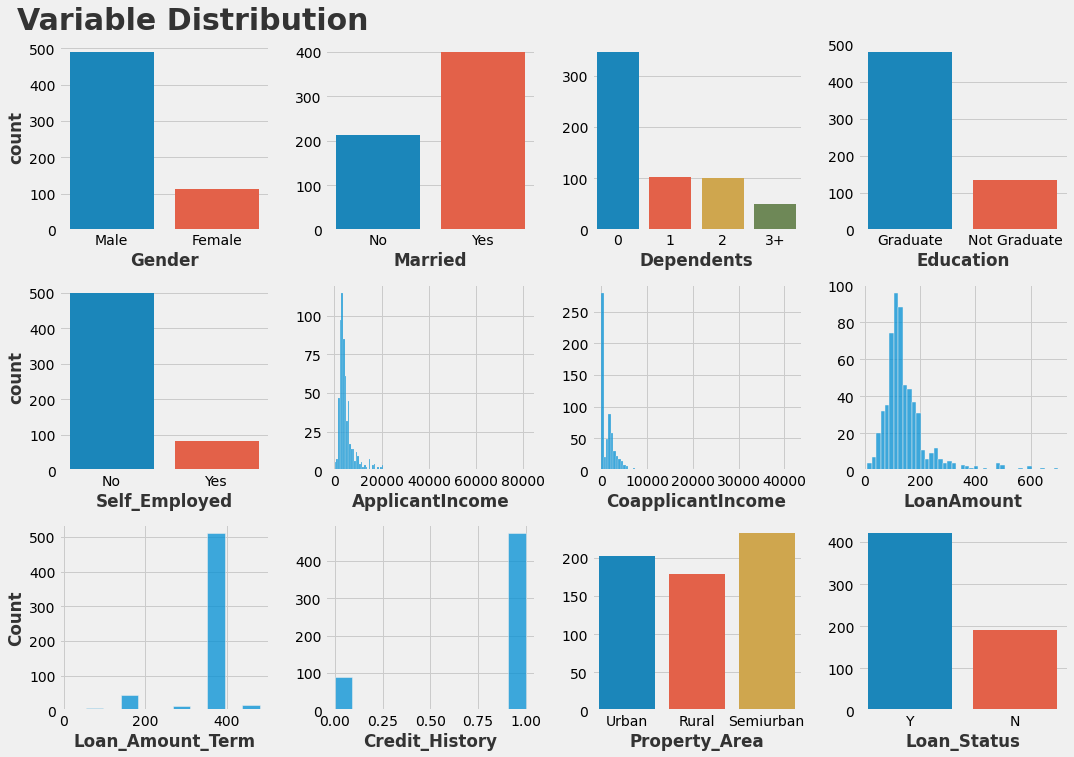

In [99]:
# Plot distribution of variables
r = 3
c = 4
fig, ax =  plt.subplots(r, c, figsize=(15, 10))
fig.tight_layout(h_pad=2.2)  
plt.text(-0.2, 1.2, "Variable Distribution", ha='left', va='top', transform=ax[0, 0].transAxes, fontsize=30, fontweight='bold')
for i in range(len(cols)):
    if cols[i] in categorical_cols:
        sns.countplot(df[cols[i]], ax=ax[i//c, i%c])
    else:
        sns.histplot(df[cols[i]], ax=ax[i//c, i%c])
    if i % c != 0:
        ax[i//c, i%c].set_ylabel("");

<h2><b>Exploratory Data Analysis</b></h2>

* About 31% of applicants were rejected, and the rest of 69% are approved
* 'Married': 'Yes', 'Dependents': 2, 'Education': 'Graduate', and 'Property_Area': 'Semiurban' have the lower reject rate than the average.
* 'Married': 'No', 'Education': 'Not Graduate', and 'Property_Area': 'Rural' have the reject rate of over 37%  
* 'Education': 'Not Graduate' has the highest reject rate of 38.81%
* Applicants' financial status has no signiificant differency in 'ApplicantIncome', 'CoapplicantIncome', and 'LoanAmount'
* 360 is the most popular 'Loan_Amount_Term
* The most of applicant has 'Credit_History'
* "Property_Area is distributed almost evenly
* Having 'CoapplicantIncome' increase the acceptance rate to about 7%
* The loan reject rate varies in a Group of married mal: with a graduate degree, the reject rate is about 25%, while without a graduate degree is about 40%<b>  
<a href="#Top"><h5>Top</h5></a>

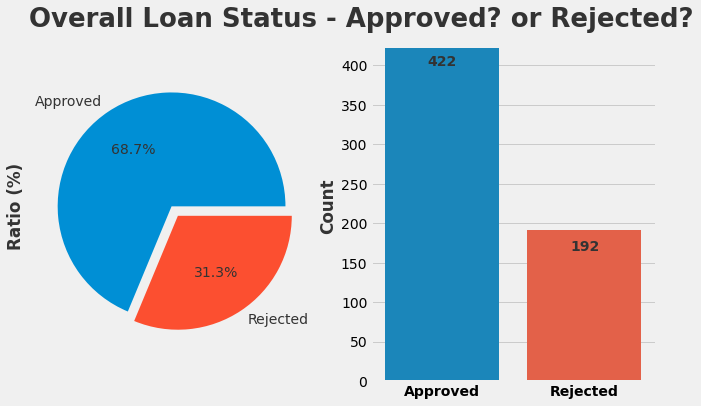

In [100]:
# Plot the number of 'Loan_Status' and its ratio
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 6))
plt.text(0, 1.2, "Overall Loan Status - Approved? or Rejected?", ha='left', va='top', transform=ax1.transAxes, fontsize=26, fontweight='bold')
plt.text(-0.1, 400, df['Loan_Status'].value_counts()[0], fontweight='bold')
plt.text(0.9, 165, df['Loan_Status'].value_counts()[1], fontweight='bold')

ax1.pie(df['Loan_Status'].value_counts(), explode=[0, 0.1], autopct='%1.1f%%', labels=['Approved', 'Rejected'])
ax1.set_ylabel('Ratio (%)')

sns.countplot('Loan_Status', data=df, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Count')
ax2.set_xticklabels(['Approved', 'Rejected'], fontdict={'fontweight': 'bold'});

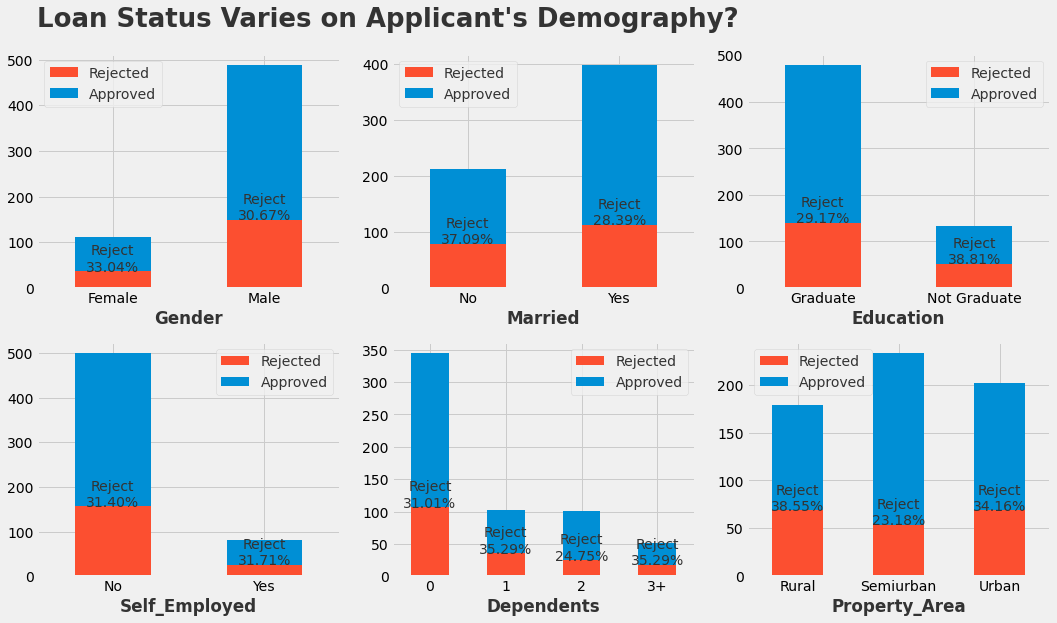

In [101]:
# Plot distribution of variables
cols_to_plot = ['Gender', 'Married', 'Education', 
                'Self_Employed', 'Dependents', 'Property_Area']

r = 2
c = 3
fig, ax =  plt.subplots(r, c, figsize=(15, 8))
fig.tight_layout(h_pad=2.2)  

plt.text(0, 1.2, "Loan Status Varies on Applicant's Demography?", 
         ha='left', va='top', transform=ax[0, 0].transAxes, fontsize=26, fontweight='bold')

for i in range(len(cols_to_plot)):
    temp_df = df.groupby([cols_to_plot[i], 'Loan_Status'])[['Loan_Status']].agg(count=('Loan_Status', 'count')).reset_index()
    temp_df = temp_df.pivot(index=cols_to_plot[i], columns='Loan_Status', values='count')

    bar1 = temp_df.plot(kind='bar', stacked=True, ax=ax[i//c, i%c], color=["#fc4f30", "#008fd5"])
    ax[i//c, i%c].set_xlabel(cols_to_plot[i])
    bar1.set_xticklabels(bar1.get_xticklabels(), rotation=0, ha='center')
    ax[i//c, i%c].legend(['Rejected','Approved']);

    # Calculate the reject ratio 
    temp_df['ratio'] = temp_df['N'] / (temp_df['N'] + temp_df['Y'])

    # Print 'ratio'
    for j in range(len(temp_df)):
        ax[i//c, i%c].text(j, temp_df.iloc[j, 0], f"Reject\n{temp_df.iloc[j, -1]:.2%}", ha='center')

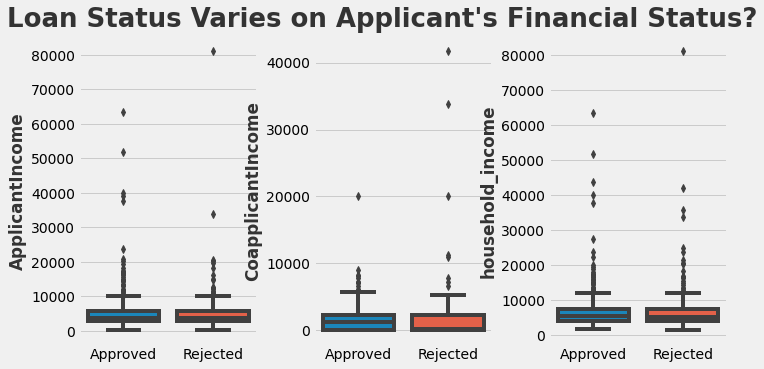

In [102]:
# Check 'Loan_Status' by 'ApplicantIncome', 'CoapplicantIncome', 'household_income'
df['household_income'] = df['CoapplicantIncome'] + df['ApplicantIncome']
cols_to_boxplot = ['ApplicantIncome', 'CoapplicantIncome', 'household_income']
r = 1
c = 3
fig, ax =  plt.subplots(r, c, figsize=(10, 5))
fig.tight_layout(h_pad=2.2)
plt.text(-0.4, 1.1, "Loan Status Varies on Applicant's Financial Status?", ha='left', va='top', transform=ax[0].transAxes, fontsize=26, fontweight='bold')

for i in range(len(cols_to_boxplot)):
    temp_df = df.groupby([cols_to_boxplot[i], 'Loan_Status'])[['Loan_Status']].agg(count=('Loan_Status', 'count')).reset_index()

    box1 = sns.boxplot('Loan_Status', cols_to_boxplot[i], data=df, ax=ax[i%c], palette=["#008fd5", "#fc4f30"])
    ax[i%c].set_xlabel("")
    box1.set_xticklabels(['Approved', 'Rejected'], rotation=0, ha='center')

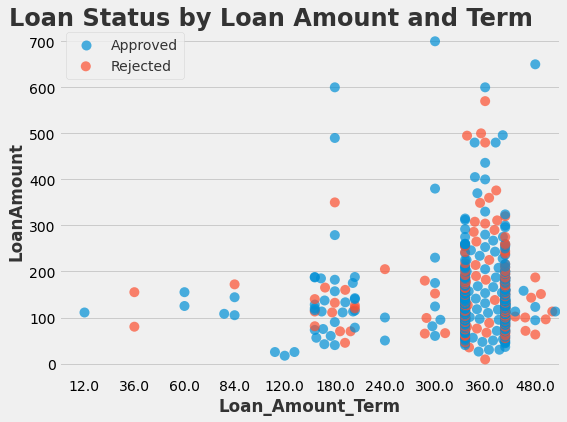

In [103]:
# Visialize the relationship between 'LoanAmount' and 'Loan_Amount_Term'
fig, ax =  plt.subplots(figsize=(8, 6))
plt.text(-0.1, 1, "Loan Status by Loan Amount and Term", transform=ax.transAxes, fontsize=24, fontweight='bold')
sns.swarmplot('Loan_Amount_Term', 'LoanAmount', data=df, hue='Loan_Status', size=10, alpha=0.7, palette=["#008fd5", "#fc4f30"])
plt.legend(['Approved', 'Rejected']);

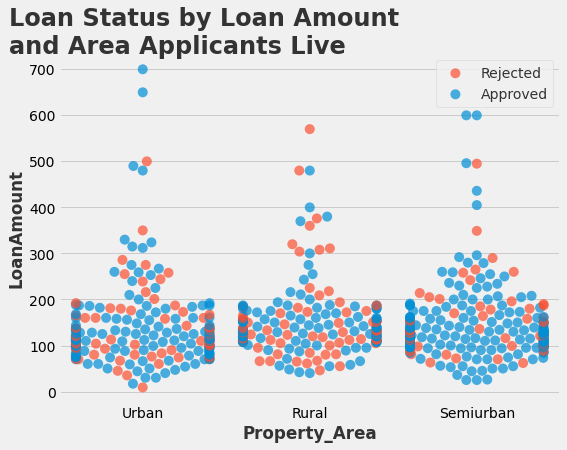

In [104]:
fig, ax =  plt.subplots(figsize=(8, 6))
plt.text(-0.1, 1, "Loan Status by Loan Amount\nand Area Applicants Live", transform=ax.transAxes, fontsize=24, fontweight='bold')
sns.swarmplot('Property_Area', 'LoanAmount', data=df, hue='Loan_Status', size=10, alpha=0.7, palette=["#008fd5", "#fc4f30"])
plt.legend(['Rejected', 'Approved']);

#### **Hypothesis Based EDA**
* Having a CoapplicantIncome increases the loan approval rate</br>
* With CoapplicantIncome, the approval rate is about 72%, while applicants without CoapplicantIncome is about 65%
* The number of rejected applicants is about the same for both with CoapplicantIncome and without CoapplicantIncome

In [105]:
# Check the basic statistics of temp_df
df.groupby('Loan_Status')['ApplicantIncome', 'household_income', 'LoanAmount'].agg(['mean', 'median'])

ApplicantIncome         household_income          LoanAmount  \
                       mean  median             mean  median        mean   
Loan_Status                                                                
N               5446.078125  3833.5      7323.885417  5289.5  151.220994   
Y               5384.068720  3812.5      6888.585118  5439.0  144.294404   

                    
            median  
Loan_Status         
N            129.0  
Y            126.0

In [106]:
# Check having 'CoapplIcantIncome' makes different 'Loan_Status'
df['with_coapplicant'] = df['CoapplicantIncome'] > 0

group_by_loan_coapplicant = df.groupby(['with_coapplicant', 'Loan_Status'])['household_income', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']\
                              .agg(household_mean=('household_income', 'mean'), 
                                   applicant_mean=('ApplicantIncome', 'mean'),
                                   coapplicant_mean=('CoapplicantIncome', 'mean'),
                                   loan_amount_mean=('LoanAmount', 'mean'),
                                   count=('CoapplicantIncome', 'count')).reset_index()

with_coapplicant = group_by_loan_coapplicant[group_by_loan_coapplicant['with_coapplicant']]
wo_coapplicant = group_by_loan_coapplicant[~group_by_loan_coapplicant['with_coapplicant']]

Text(0.5, 0, 'Without Coapplicants')

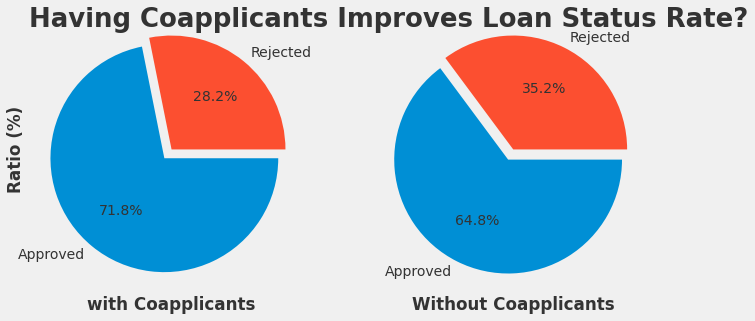

In [107]:
with_coapplicant['count']/with_coapplicant['count'].sum()*100
wo_coapplicant['count']/wo_coapplicant['count'].sum()*100

# Plot the number of 'Loan_Status' and its ratio
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 6))
plt.text(0, 1, "Having Coapplicants Improves Loan Status Rate?", ha='left', va='top', transform=ax1.transAxes, fontsize=26, fontweight='bold')

ax1.pie(with_coapplicant['count'], explode=[0, 0.1], autopct='%1.1f%%', labels=['Rejected', 'Approved'], colors=["#fc4f30", "#008fd5"])
ax2.pie(wo_coapplicant['count'], explode=[0, 0.1], autopct='%1.1f%%', labels=['Rejected', 'Approved'], colors=["#fc4f30", "#008fd5"])
ax1.set_xlabel('with Coapplicants')
ax1.set_ylabel('Ratio (%)')
ax2.set_xlabel('Without Coapplicants')

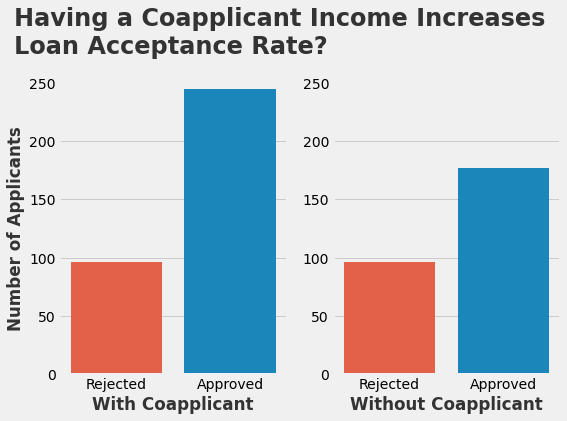

In [108]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8, 5))
# plt.tight_layout(h_pad=1.2)
plt.text(-0.2, 1.1, "Having a Coapplicant Income Increases\nLoan Acceptance Rate?", transform=ax1.transAxes, fontsize=24, fontweight='bold')

bar1 = sns.barplot('Loan_Status', 'count', data=with_coapplicant, ax=ax1, palette=["#fc4f30", "#008fd5"])
bar2 = sns.barplot('Loan_Status', 'count', data=wo_coapplicant, ax=ax2, palette=["#fc4f30", "#008fd5"])
bar1.set_ylim((0, 250))
bar2.set_ylim((0, 250))

bar1.set_xticklabels(['Rejected', 'Approved'], rotation=0, ha='center')
bar2.set_xticklabels(['Rejected', 'Approved'], rotation=0, ha='center');

ax1.set_xlabel("With Coapplicant")
ax1.set_ylabel("Number of Applicants")
ax2.set_xlabel("Without Coapplicant")
ax2.set_ylabel("");

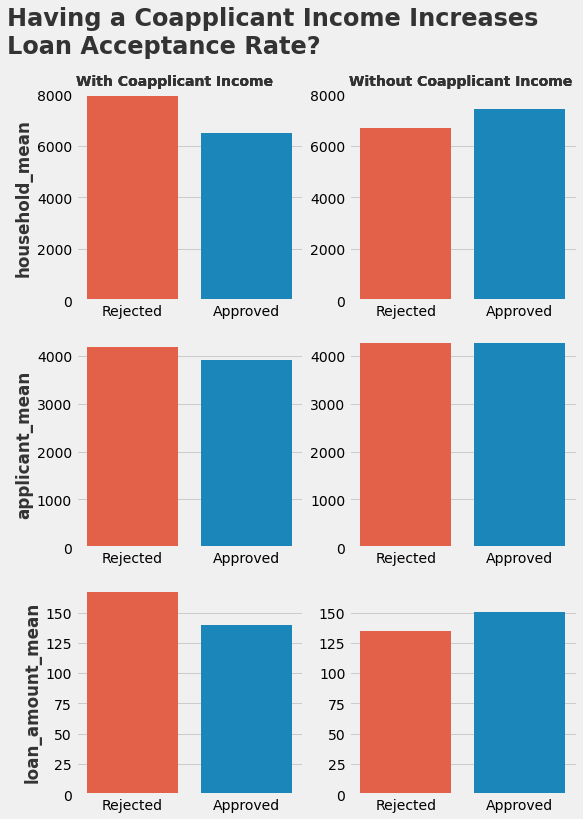

In [109]:
cols_to_plot = ['household_mean', 'applicant_mean', 'loan_amount_mean']
ylims = [(0, 8000), (0, 4300), (0, 170)]
r = 3
c = 2
fig, ax =  plt.subplots(r, c, figsize=(8, 12))
# plt.tight_layout(h_pad=1.2)
plt.text(-0.3, 1.2, "Having a Coapplicant Income Increases\nLoan Acceptance Rate?", transform=ax[0, 0].transAxes, fontsize=24, fontweight='bold')
for i in range(len(cols_to_plot)):
    bar1 = sns.barplot('Loan_Status', cols_to_plot[i], data=with_coapplicant, ax=ax[i, 0], palette=["#fc4f30", "#008fd5"])
    bar2 = sns.barplot('Loan_Status', cols_to_plot[i], data=wo_coapplicant, ax=ax[i, 1], palette=["#fc4f30", "#008fd5"])
    ax[0, 0].text(0, 1.1, "With Coapplicant Income", ha='left', va='top', transform=ax[0, 0].transAxes, fontsize=14, fontweight='bold')
    ax[0, 1].text(0, 1.1, "Without Coapplicant Income", ha='left', va='top', transform=ax[0, 1].transAxes, fontsize=14, fontweight='bold')
    ax[i, 0].set_xlabel("")
    ax[i, 1].set_xlabel("")
    ax[i, 1].set_ylabel("")
    bar1.set_ylim(ylims[i])
    bar2.set_ylim(ylims[i])
    bar1.set_xticklabels(['Rejected', 'Approved'], rotation=0, ha='center')
    bar2.set_xticklabels(['Rejected', 'Approved'], rotation=0, ha='center');

#### **Hypothesis Based EDA**
*  Graduated Married Male have any positive impact on the Loan Status
compared to the Non-Graduated Married Male?

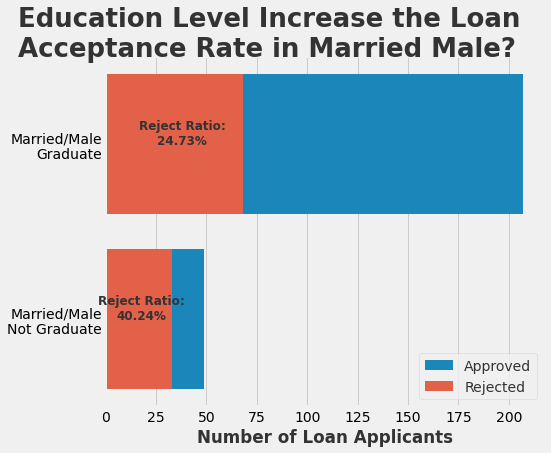

In [110]:
# Compare 'Loan_Status' by 'Education', 'Gender', 'Married"
group_by_ed_gdr_mar = df.groupby(['Gender', 'Education', 'Married', 'Loan_Status'])['Loan_Status', 'ApplicantIncome', 'LoanAmount'].\
    agg(count_loan_status=('Loan_Status', 'count'),
        mean_applicant_income=('ApplicantIncome', 'mean'),
        mean_loan_amount=('LoanAmount', 'mean')).reset_index()

group_by_ed_gdr_mar = group_by_ed_gdr_mar[(group_by_ed_gdr_mar['Married'] == 'Yes') & (group_by_ed_gdr_mar['Gender'] == 'Male')]

graduated = group_by_ed_gdr_mar[group_by_ed_gdr_mar['Education'] == "Graduate"]
total_graduated = graduated['count_loan_status'].sum()
rejected_graduated = graduated[graduated['Loan_Status'] == 'N']['count_loan_status']
rejected_ratio_graduated = float(rejected_graduated / total_graduated)

notgraduated = group_by_ed_gdr_mar[group_by_ed_gdr_mar['Education'] == "Not Graduate"]
total_notgraduated = notgraduated['count_loan_status'].sum()
rejected_notgraduated = notgraduated[notgraduated['Loan_Status'] == 'N']['count_loan_status']
rejected_ratio_notgraduated = float(rejected_notgraduated / total_notgraduated)

approved_group_by_ed_gdr_mar = group_by_ed_gdr_mar[group_by_ed_gdr_mar['Loan_Status'] == 'Y']
rejected_group_by_ed_gdr_mar = group_by_ed_gdr_mar[group_by_ed_gdr_mar['Loan_Status'] == 'N']

fig, ax =  plt.subplots(figsize=(7, 6))
plt.text(-0.2, 1, "Education Level Increase the Loan\nAcceptance Rate in Married Male?", transform=ax.transAxes, fontsize=26, fontweight='bold')

sns.barplot(x='count_loan_status', y='Education', data=approved_group_by_ed_gdr_mar, label='Approved', color="#008fd5", ci = 0)
sns.barplot(x='count_loan_status', y='Education', data=rejected_group_by_ed_gdr_mar, label='Rejected', color="#fc4f30", ci = 0)
plt.legend()

plt.xlabel("Number of Loan Applicants")
plt.ylabel("")
ax.set_yticklabels(['Married/Male\nGraduate', 'Married/Male\nNot Graduate'])
plt.text(rejected_graduated-30, 0, f"Reject Ratio:\n{rejected_ratio_graduated:.2%}", fontsize=12, ha='center', fontweight='bold')
plt.text(rejected_notgraduated-15, 1, f"Reject Ratio:\n{rejected_ratio_notgraduated:.2%}", fontsize=12, ha='center', fontweight='bold');

#### **Hypothesis Based EDA**
*  What is the Loan Approval Percentage of users who request for a higher loan amount
(Loan Amount >=$200) across different Property Area?

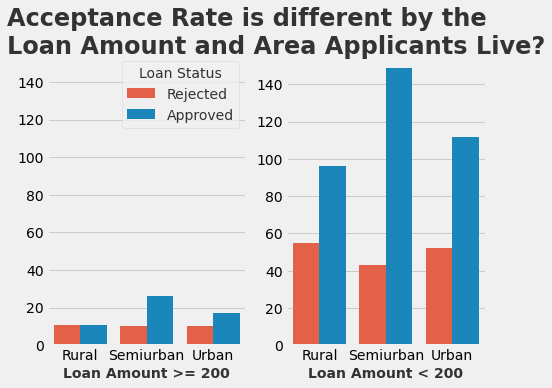

In [111]:
# Check the comparison between 'LoanAmount' and 'Property_Area'
df_by_loanamount_greater_than_200 = df[df['LoanAmount'] >= 200]
group_by_property_area_greater_200 = df_by_loanamount_greater_than_200.groupby(['Loan_Status', 'Property_Area'])[['Loan_Status', 'Property_Area']].\
    agg(count=('Property_Area', 'count')).reset_index()

df_by_loanamount_less_than_200 = df[df['LoanAmount'] < 200]
group_by_property_area_less_200 = df_by_loanamount_less_than_200.groupby(['Loan_Status', 'Property_Area'])[['Loan_Status', 'Property_Area']].\
    agg(count=('Property_Area', 'count')).reset_index()

ig, (ax1, ax2) =  plt.subplots(1, 2, figsize=(7, 5))
plt.text(-0.2, 1, "Acceptance Rate is different by the\nLoan Amount and Area Applicants Live?", transform=ax1.transAxes, fontsize=24, fontweight='bold')

sns.barplot('Property_Area', 'count', data=group_by_property_area_greater_200, ax=ax1, hue='Loan_Status', palette=["#fc4f30", "#008fd5"])
sns.barplot('Property_Area', 'count', data=group_by_property_area_less_200, ax=ax2, hue='Loan_Status', palette=["#fc4f30", "#008fd5"])
ax1.set_xlabel("Loan Amount >= 200", fontsize=14)
ax2.set_xlabel("Loan Amount < 200", fontsize=14)
ax1.set_ylabel("")
ax2.set_ylabel("")
ax1.set_ylim((0, 155))
h, l = ax1.get_legend_handles_labels()
ax1.legend(h, ['Rejected', 'Approved'], title="Loan Status")
ax2.legend_ = None;

<h2><b>Feature Engineering</b></h2>
<a href="#Top"><h5>Top</h5></a>

#### Missing Value Analysis
* 'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term' and 'Credit_History' have null values 
* It is reasonable to treat null values as follows
* 'Gender' --> 'No Answer'
* 'Married' --> 'No'
* 'Dependents' --> '0'
* 'Self_Employed' --> 
* 'LoanAmount' -->, median
* 'Loan_Amount_Term' and 'Credit_History' --> mode

In [112]:
df['Gender_cleaned'] = df['Gender'].fillna('Unknown') 
df['Married_cleaned'] = df['Married'].fillna('No') 
df['Dependents_cleaned'] = df['Dependents'].fillna('0')
df['Self_Employed_cleaned'] = df['Self_Employed'].fillna('Unknown') 
df['LoanAmount_cleaned'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term_cleaned'] = df['Loan_Amount_Term'].fillna(360.0)
df['Credit_History_cleaned'] = df['Credit_History'].fillna(1.0)

In [113]:
df_cleaned = df.copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    601 non-null    object 
 1   Married                   611 non-null    object 
 2   Dependents                599 non-null    object 
 3   Education                 614 non-null    object 
 4   Self_Employed             582 non-null    object 
 5   ApplicantIncome           614 non-null    int64  
 6   CoapplicantIncome         614 non-null    float64
 7   LoanAmount                592 non-null    float64
 8   Loan_Amount_Term          600 non-null    float64
 9   Credit_History            564 non-null    float64
 10  Property_Area             614 non-null    object 
 11  Loan_Status               614 non-null    object 
 12  household_income          614 non-null    float64
 13  with_coapplicant          614 non-null    bool   
 14  Gender_cle

#### Handling Outliers
* 'ApplicantIncome', 'CoapplicantIncome', 'household_income', and 'LoanAmount_cleaned' have outliers
* Replace outliers with the upper border value, whici is about 95% percentile

In [114]:
# Function to calculate the lower and upper borders
def get_outlier_borders(nums):
    """
    Returns the upper and lower borders
        Parameters: 
            Array like iterable of numbers
        Returns:
            Scalers of numbers that is upper border and lower border
    """
    q1, q3 = np.percentile(nums, [25, 75])
    iqr = q3 - q1
    upper_border = q3 + iqr * 1.5
    lower_border = nums.min()
    return lower_border, upper_border

In [115]:
# Replace outliers with the upper_border value
cols_remove_outliers = ['ApplicantIncome', 'CoapplicantIncome', 'household_income', 'LoanAmount_cleaned']

for col in cols_remove_outliers:
    (lower_border, upper_border) = get_outlier_borders(df_cleaned[col])
    df_cleaned[col][df_cleaned[col] > upper_border] = upper_border

In [116]:
# Check the distribution of features after removed outliers
df_cleaned[['ApplicantIncome', 'CoapplicantIncome', 'household_income', 'LoanAmount_cleaned']].describe()

,ApplicantIncome,CoapplicantIncome,household_income,LoanAmount_cleaned
count,614.000000,614.000000,614.00000,614.000000
mean,4617.111564,1419.702231,6194.72259,138.025354
std,2479.851729,1624.605892,2875.79192,55.773951
min,150.000000,0.000000,1442.00000,9.000000
25%,2877.500000,0.000000,4166.00000,100.250000
50%,3812.500000,1188.500000,5416.50000,129.000000
75%,5795.000000,2297.250000,7521.75000,164.750000
max,10171.250000,5743.125000,12555.37500,261.500000


#### Encode Categorical Variables
* Encode 'Property_Area', 'Gender_cleaned', 'Dependents_cleaned', and 'Self_Employed_cleaned' using TargetEncoder()
* Replace values in 'Married_cleaned', 'Education', and 'Loan_Status' with 0 and 1
* Replace values in 'Education' and 'Loan_Status' with 0 and 1
* Create 'Education_bool' and 'Loan_Status_bool'
* Replace values in 'Property_Area', 'Gender_cleaned', 'Married_cleaned',  and'Self_Employed_cleaned' with 0, 1, 2
* Create 'Property_Area_encoded', 'Gender_cleaned_encoded', 'Married_cleaned_encoded' and 'Self_Employed_cleaned_encoded'

In [117]:
df_encooded = df_cleaned.copy()

In [118]:
# Create a function to map values to 0, 1 and 2
def map_to_numerical(col, value_to_map):
    local_dict = dict(zip(col.unique(), value_to_map))
    temp = col.map(local_dict)
    return temp

In [119]:
# Map values to 0 and 1 
cols_to_bool = ['Loan_Status', 'Education']
value_to_map = [1, 0]
for col in cols_to_bool:
    df_encooded[col + '_bool'] = map_to_numerical(df_encooded[col], value_to_map)

In [120]:
for col in df_encooded.columns:
    if df_encooded[col].dtype!=np.number:
        print(col)

Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status
with_coapplicant
Gender_cleaned
Married_cleaned
Dependents_cleaned
Self_Employed_cleaned
Loan_Status_bool
Education_bool


In [121]:
# Calculate mean
cols_to_encode = ['Property_Area', 'Gender_cleaned', 'Dependents_cleaned', 'Self_Employed_cleaned', 'Married_cleaned']
stats = []
for col in cols_to_encode:
    stats_col = df_encooded['Loan_Status_bool'].groupby(df_encooded[col]).agg(['count', 'mean'])
    stats.append(stats_col)

In [122]:
# Manually encode using prior smoothing technique
smoothing_factor = 1.0 # The f of the smoothing factor equation 
min_samples_leaf = 1 # The k of the smoothing factor equation
prior = df_encooded['Loan_Status_bool'].mean()
encoded = []

for i in range(len(stats)):
    smoove = 1 / (1 + np.exp(-(stats[i]['count'] - min_samples_leaf) / smoothing_factor))
    smoothing = prior * (1 - smoove) + stats[i]['mean'] * smoove
    encoded.append(pd.Series(smoothing, name = cols_to_encode[i] + '_encoded'))

In [123]:
# Create a dictionary to hold mapping information
temp_dict = {}
for i in range(len(cols_to_encode)):
    for j in range(df_encooded[cols_to_encode[i]].nunique()):
        k = df_encooded[cols_to_encode[i]].unique()[j]
        v = encoded[i][j]
        temp_dict[k] = v

In [124]:
# Check a temp_dict dictionary
temp_dict

{'Urban': 0.6145251396648045,
 'Rural': 0.7682403433476395,
 'Semiurban': 0.6584158415841584,
 'Male': 0.6696428571428571,
 'Female': 0.6932515337423313,
 'Unknown': 0.6829268292682927,
 '0': 0.6861111111111111,
 '1': 0.6470588235294118,
 '2': 0.7524752475247525,
 '3+': 0.6470588235294118,
 'No': 0.6342592592592593,
 'Yes': 0.7160804020100503}

In [125]:
# Replace values in the original variables with the encoded values
for i in range(len(cols_to_encode)):
    df_encooded[encoded[i].name] = df_encooded[cols_to_encode[i]].map(temp_dict)

In [126]:
# Check df
df_encooded.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,household_income,with_coapplicant,Gender_cleaned,Married_cleaned,Dependents_cleaned,Self_Employed_cleaned,LoanAmount_cleaned,Loan_Amount_Term_cleaned,Credit_History_cleaned,Loan_Status_bool,Education_bool,Property_Area_encoded,Gender_cleaned_encoded,Dependents_cleaned_encoded,Self_Employed_cleaned_encoded,Married_cleaned_encoded
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y,5849.0,False,Male,No,0,No,146.412162,360.0,1.0,1,1,0.614525,0.669643,0.686111,0.634259,0.634259
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0,True,Male,Yes,1,No,128.000000,360.0,1.0,0,1,0.768240,0.669643,0.647059,0.634259,0.716080
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0,False,Male,Yes,0,Yes,66.000000,360.0,1.0,1,1,0.614525,0.669643,0.686111,0.716080,0.716080
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,True,Male,Yes,0,No,120.000000,360.0,1.0,1,0,0.614525,0.669643,0.686111,0.634259,0.716080
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0,False,Male,No,0,No,141.000000,360.0,1.0,1,1,0.614525,0.669643,0.686111,0.634259,0.634259


<h2><b>Data preprocessing</b></h2>
<a href="#Top"><h5>Top</h5></a>

#### Scale Variables
* Log scale 'LoanAmount_cleaned', 'Loan_Amount_Term_cleaned', and 'Credit_History_cleaned' 

In [127]:
df_scaled = df_encooded.copy()

In [128]:
# Log scale 'ApplicantIncome', 'CoapplicantIncome', 'household_income', 'LoanAmount_cleaned'
def log_scale(array):
    array = np.log(array + 1)
    return array

cols_to_logscale = ['ApplicantIncome', 'CoapplicantIncome', 'household_income', 
                 'LoanAmount_cleaned', 'Loan_Amount_Term_cleaned']
for col in cols_to_logscale:
    df_scaled[col + "_logscaled"] = log_scale(df_scaled[col])

In [129]:
# Standardize 'Credit_History_cleaned' 
df_scaled['Credit_History_cleaned_scaled'] = (df_scaled['Credit_History_cleaned'] - df_scaled['Credit_History_cleaned'].mean()) / df_scaled['Credit_History_cleaned'].std()

In [130]:
df_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,household_income,with_coapplicant,Gender_cleaned,Married_cleaned,Dependents_cleaned,Self_Employed_cleaned,LoanAmount_cleaned,Loan_Amount_Term_cleaned,Credit_History_cleaned,Loan_Status_bool,Education_bool,Property_Area_encoded,Gender_cleaned_encoded,Dependents_cleaned_encoded,Self_Employed_cleaned_encoded,Married_cleaned_encoded,ApplicantIncome_logscaled,CoapplicantIncome_logscaled,household_income_logscaled,LoanAmount_cleaned_logscaled,Loan_Amount_Term_cleaned_logscaled,Credit_History_cleaned_scaled
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y,5849.0,False,Male,No,0,No,146.412162,360.0,1.0,1,1,0.614525,0.669643,0.686111,0.634259,0.634259,8.674197,0.000000,8.674197,4.993232,5.888878,0.411397
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0,True,Male,Yes,1,No,128.000000,360.0,1.0,0,1,0.768240,0.669643,0.647059,0.634259,0.716080,8.430327,7.319202,8.714732,4.859812,5.888878,0.411397
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0,False,Male,Yes,0,Yes,66.000000,360.0,1.0,1,1,0.614525,0.669643,0.686111,0.716080,0.716080,8.006701,0.000000,8.006701,4.204693,5.888878,0.411397
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,True,Male,Yes,0,No,120.000000,360.0,1.0,1,0,0.614525,0.669643,0.686111,0.634259,0.716080,7.857094,7.765993,8.505525,4.795791,5.888878,0.411397
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0,False,Male,No,0,No,141.000000,360.0,1.0,1,1,0.614525,0.669643,0.686111,0.634259,0.634259,8.699681,0.000000,8.699681,4.955827,5.888878,0.411397


#### Create New Features
* Create 2 new features: Gender+Married+Education and Self_Employed+Property_Area

In [131]:
# Create Gender+Married+Education --> gender_married_education
df_scaled['gender_married_education'] = df_scaled['Gender_cleaned_encoded'] + df_scaled['Married_cleaned_encoded'] + df_scaled['Education_bool']

# Create Self_Employed+Property_Area --> selfemployed_property
df_scaled['selfemployed_property'] = df_scaled['Self_Employed_cleaned_encoded'] + df_scaled['Property_Area_encoded']

In [132]:
# Check df
df_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,household_income,with_coapplicant,Gender_cleaned,Married_cleaned,Dependents_cleaned,Self_Employed_cleaned,LoanAmount_cleaned,Loan_Amount_Term_cleaned,Credit_History_cleaned,Loan_Status_bool,Education_bool,Property_Area_encoded,Gender_cleaned_encoded,Dependents_cleaned_encoded,Self_Employed_cleaned_encoded,Married_cleaned_encoded,ApplicantIncome_logscaled,CoapplicantIncome_logscaled,household_income_logscaled,LoanAmount_cleaned_logscaled,Loan_Amount_Term_cleaned_logscaled,Credit_History_cleaned_scaled,gender_married_education,selfemployed_property
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y,5849.0,False,Male,No,0,No,146.412162,360.0,1.0,1,1,0.614525,0.669643,0.686111,0.634259,0.634259,8.674197,0.000000,8.674197,4.993232,5.888878,0.411397,2.303902,1.248784
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0,True,Male,Yes,1,No,128.000000,360.0,1.0,0,1,0.768240,0.669643,0.647059,0.634259,0.716080,8.430327,7.319202,8.714732,4.859812,5.888878,0.411397,2.385723,1.402500
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0,False,Male,Yes,0,Yes,66.000000,360.0,1.0,1,1,0.614525,0.669643,0.686111,0.716080,0.716080,8.006701,0.000000,8.006701,4.204693,5.888878,0.411397,2.385723,1.330606
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,True,Male,Yes,0,No,120.000000,360.0,1.0,1,0,0.614525,0.669643,0.686111,0.634259,0.716080,7.857094,7.765993,8.505525,4.795791,5.888878,0.411397,1.385723,1.248784
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0,False,Male,No,0,No,141.000000,360.0,1.0,1,1,0.614525,0.669643,0.686111,0.634259,0.634259,8.699681,0.000000,8.699681,4.955827,5.888878,0.411397,2.303902,1.248784


<h2><b>Finalize Dataset</b></h2>

* The heatmap shows 'Property_Area_encoded' and 'selfemployed_property' are strongly correlated --> Remove 'Property_Area_encoded'
* 'Education_bool' amd 'gender_married_education' are strpmg;u correalated --> Remove 'Education_bool'
* Remove features
* Separate  
<a href="#Top"><h5>Top</h5></a>

In [133]:
df_final = df_scaled.copy()

In [134]:
cols_to_use = ['ApplicantIncome_logscaled', 'CoapplicantIncome_logscaled', 
               'Credit_History_cleaned_scaled', 'Dependents_cleaned_encoded', 'Education_bool', 
               'Gender_cleaned_encoded', 'gender_married_education', 'Loan_Amount_Term_cleaned_logscaled', 
               'LoanAmount_cleaned_logscaled', 'Married_cleaned_encoded', 'Property_Area_encoded', 
               'Self_Employed_cleaned_encoded', 'selfemployed_property']

In [135]:
df_final = df_final[cols_to_use]
df_final['Loan_Status_bool'] = df_scaled['Loan_Status_bool']

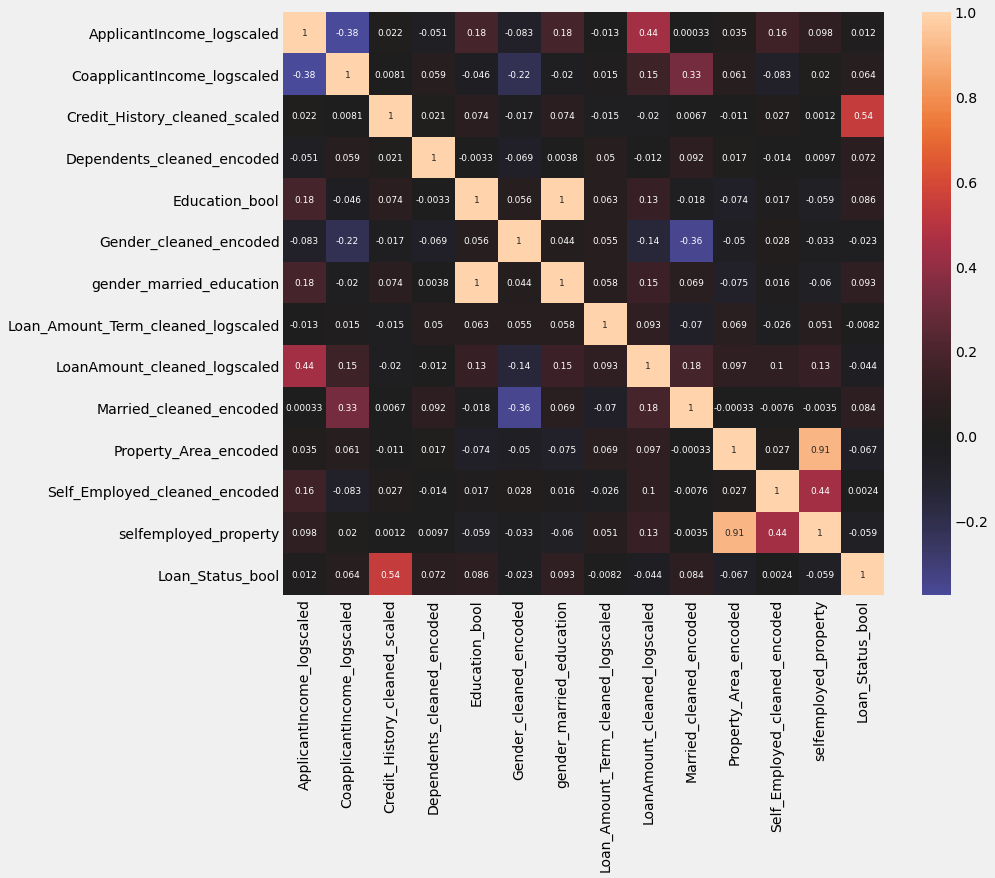

In [136]:
correlation = df_final.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation, annot=True, annot_kws={'size': 9}, center=0);

<h2><b>Feature Selection Using RFE (Recursive Feature Elimination)</b></h2>

* Many features correlated with each other</br>
* Eliminate features using RFE
<a href="#Top"><h5>Top</h5></a>

In [137]:
# Import modules for model creation, validation and feature selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import resample

In [138]:
cols_to_use = ['ApplicantIncome_logscaled', 'CoapplicantIncome_logscaled', 
               'Credit_History_cleaned_scaled', 'Dependents_cleaned_encoded', 
               'Gender_cleaned_encoded', 'gender_married_education', 'Loan_Amount_Term_cleaned_logscaled', 
               'LoanAmount_cleaned_logscaled', 'Married_cleaned_encoded', 
               'Self_Employed_cleaned_encoded', 'selfemployed_property']

In [139]:
X = df_final[cols_to_use]
y = df_final['Loan_Status_bool']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [141]:
rfc = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train, y_train)

print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 8


In [142]:
print(np.where(rfecv.support_ != False)[0])
X_train_after_rfe = X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1)
cols_selected_rfe = X_train_after_rfe.columns

[ 0  1  2  3  5  6  7 10]


In [143]:
cols_selected_rfe

Index(['ApplicantIncome_logscaled', 'CoapplicantIncome_logscaled',
       'Credit_History_cleaned_scaled', 'Dependents_cleaned_encoded',
       'gender_married_education', 'Loan_Amount_Term_cleaned_logscaled',
       'LoanAmount_cleaned_logscaled', 'selfemployed_property'],
      dtype='object')

<h2><b>Model Creation</b></h2>
<h4><b>Logistics Regression Model</b></h4>
1. Base model</br>
2. With columns selected with RFE</br>
3. Upsampling with columns selected with RFE</br>
4. Downsampling with columns selected with RFE</br>
5. Class weight with columns selected with RFE</br>
<h4><b>Random Forest Classifier</b></h4>
6. Class weight with columns selected with RFE</br>
<a href="#Top"><h5>Top</h5></a>

##### 1. Base Model Creation and Model Performance

In [144]:
# Calculate y_pred and y_pred_proba
def split_df(df, cols, label):
    X_train, X_test, y_train, y_test = train_test_split(df[cols], df[label], stratify=y, random_state=42)
    return X_train, X_test, y_train, y_test

In [145]:
# Calculate y_pred and y_pred_proba
def model_creation(model, X_train, X_test, y_train):
    trained_model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    return trained_model, y_pred, y_pred_proba

In [146]:
# Calculate roc_auc, fpr, tpr
def model_performance(y_test, y_pred_proba):
    score = [i[1] for i in y_pred_proba]
    fpr, tpr, threshold = roc_curve(y_test, score)
    roc_auc = auc(fpr, tpr)
    return roc_auc, fpr, tpr

In [147]:
# Plot roc curve
def plot_roc_curve(fpr, tpr, roc_auc):
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC (area = {roc_auc:.2%})')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve', fontweight='bold')
    plt.legend(loc="lower right");

In [148]:
# Function to calcurate prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, cm
def cal_score(y_test, y_pred): 
    cm              = confusion_matrix(y_test, y_pred)
    prec_scr_macro  = precision_score(y_test, y_pred, average='macro')*100
    prec_scr_micro  = precision_score(y_test, y_pred, average='micro')*100
    rec_scr_macro   = recall_score(y_test ,y_pred, average='macro')*100
    rec_scr_micro   = recall_score(y_test ,y_pred, average='micro')*100
    f1_scr_macro    = f1_score(y_test, y_pred, average='macro')*100 
    f1_scr_micro    = f1_score(y_test, y_pred, average='micro')*100
    specificity     = round(cm[0, 0] / (cm[0, 0] + cm[0, 1]), 2)*100

    return prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, specificity, cm

# Function to calcurate mean_acc and std_acc
def calc_mean_std(model, X_train, y_train):
    crs_val = cross_val_score(model, X_train, y_train, cv=5)
    mean_acc = round(np.mean(crs_val),3)
    std_acc  = round(np.std(crs_val),3)
    return mean_acc, std_acc

In [149]:
# Create a dataframe that contains scores
def create_score_df(trained_model, X_train, y_train, X_test, y_test):
    y_pred = trained_model.predict(X_test)
    metrics = calc_mean_std(trained_model, X_train, y_train) + cal_score(y_test, y_pred)
    return metrics

In [150]:
# Draw confusion matrix
def plot_confusion_matrix(metrics, trained_model):
    disp = ConfusionMatrixDisplay(confusion_matrix=metrics[-1], display_labels=trained_model.classes_)
    disp.plot()
    plt.title("Confusion Matrix", fontsize=22, fontweight='bold')
    plt.text(x=-0.1, y=-0.1, s="TN", fontsize=12, fontweight='bold')
    plt.text(x=-0.1, y=0.9, s="FN", fontsize=12, fontweight='bold')
    plt.text(x=0.9, y=0.9, s="TP", fontsize=12, fontweight='bold')
    plt.text(x=0.9, y=-0.1, s="FP", fontsize=12, fontweight='bold')
    plt.grid(None)

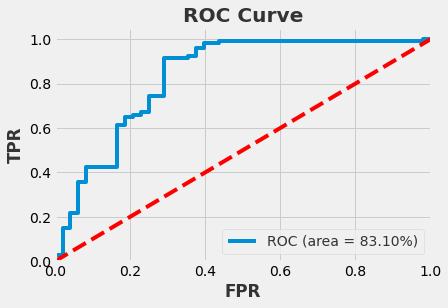

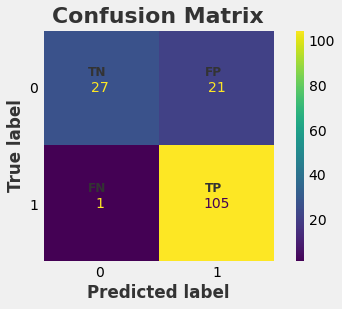

In [151]:
X_train, X_test, y_train, y_test = split_df(df_final, cols_to_use, 'Loan_Status_bool')

model = LogisticRegression()
trained_model, y_pred_lr, y_pred_proba_lr = model_creation(model, X_train, X_test, y_train)
roc_auc_lr, fpr_lr, tpr_lr = model_performance(y_test, y_pred_proba_lr)

plot_roc_curve(fpr_lr, tpr_lr, roc_auc_lr)

prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, specificity, cm = cal_score(y_test, y_pred_lr)
mean_acc, std_acc = calc_mean_std(model, X_train, y_train)
metrics = create_score_df(trained_model, X_train, y_train, X_test, y_test)

plot_confusion_matrix(metrics, trained_model)

In [152]:
# Add metrics to metrics_dict
metrics_dict = {}
metrics_dict['Logistic Regression Base Model'] = metrics

#### 2. Logistic Regression with RFE Model Creation and Performance
* Create Logistic Regression model with RFE selected columns, cols_selected_rfe

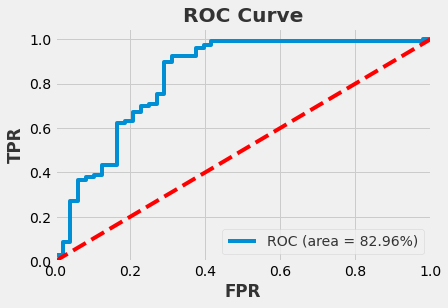

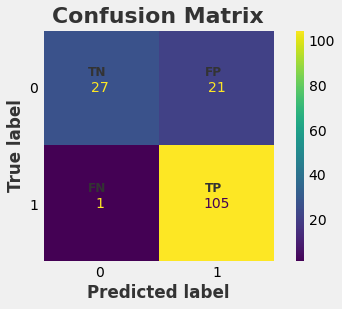

In [153]:
X_train_lr_rfe, X_test_lr_rfe, y_train_lr_rfe, y_test_lr_rfe = split_df(df_final, cols_selected_rfe, 'Loan_Status_bool')

model_lr_rfe = LogisticRegression(C=1000.0, solver='saga', penalty='elasticnet', l1_ratio=0.5)#
trained_model_lr_rfe, y_pred_lr_rfe, y_pred_proba_lr_rfe = model_creation(model_lr_rfe, X_train_lr_rfe, X_test_lr_rfe, y_train_lr_rfe)
roc_auc_lr_rfe, fpr_lr_rfe, tpr_lr_rfe = model_performance(y_test_lr_rfe, y_pred_proba_lr_rfe)

plot_roc_curve(fpr_lr_rfe, tpr_lr_rfe, roc_auc_lr_rfe)

prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, specificity, cm = cal_score(y_test_lr_rfe, y_pred_lr_rfe)
mean_acc, std_acc = calc_mean_std(model_lr_rfe, X_train_lr_rfe, y_train_lr_rfe)
metrics = create_score_df(trained_model_lr_rfe, X_train_lr_rfe, y_train_lr_rfe, X_test_lr_rfe, y_test_lr_rfe)

plot_confusion_matrix(metrics, trained_model_lr_rfe)

In [154]:
# Add metrics to metrics_dict
metrics_dict['Logistic Regression Model w RFE Selection'] = metrics

#### 3. Upsampling with RFE

In [155]:
# Create df_minority and df_majority based on the value of 'Loan_Status_bool'
df_minority = df_final[df_final['Loan_Status_bool'] == 0]
df_majority = df_final[df_final['Loan_Status_bool'] == 1]

In [156]:
print('Minor label:', len(df_minority))
print('Major label:', len(df_majority))

Minor label: 192
Major label: 422


In [157]:
# replacing the samples keeping 100000 as the defaulters to keep in line with the non defaulters
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled['Loan_Status_bool'].value_counts()

1    422
0    422
Name: Loan_Status_bool, dtype: int64

In [158]:
X_train_rfe_up, X_test_rfe_up, y_train_rfe_up, y_test_rfe_up = train_test_split(df_upsampled[cols_selected_rfe], df_upsampled['Loan_Status_bool'], random_state=42)

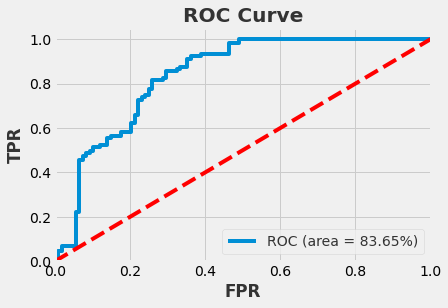

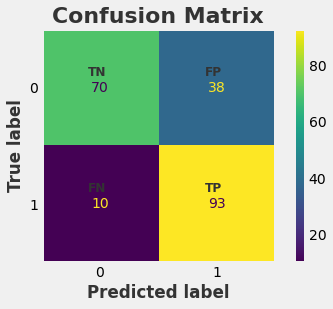

In [159]:
model_rfe = LogisticRegression()
trained_model_rfe_up, y_pred_lr_rfe_up, y_pred_proba_lr_rfe_up = model_creation(model_rfe, X_train_rfe_up, X_test_rfe_up, y_train_rfe_up)
roc_auc_lr_rfe_up, fpr_lr_rfe_up, tpr_lr_rfe_up = model_performance(y_test_rfe_up, y_pred_proba_lr_rfe_up)

plot_roc_curve(fpr_lr_rfe_up, tpr_lr_rfe_up, roc_auc_lr_rfe_up)

prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, specificity, cm = cal_score(y_test_rfe_up, y_pred_lr_rfe_up)
mean_acc, std_acc = calc_mean_std(model_rfe, X_train_rfe_up, y_train_rfe_up)
metrics = create_score_df(trained_model_rfe_up, X_train_rfe_up, y_train_rfe_up, X_test_rfe_up, y_test_rfe_up)

plot_confusion_matrix(metrics, trained_model_rfe_up)

In [160]:
# Add metrics to metrics_dict
metrics_dict['Upsampling Logistic Regression Model w RFE'] = metrics

#### 4. Downsampling with RFFE Selected Feature Model Creation 
[Top](#Top)  

In [161]:
# replacing the samples keeping 100000 as the defaulters to keep in line with the non defaulters
df_majority_downsampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
df_downsampled['Loan_Status_bool'].value_counts()

0    192
1    192
Name: Loan_Status_bool, dtype: int64

In [162]:
X_train_rfe_down, X_test_rfe_down, y_train_rfe_down, y_test_rfe_down = train_test_split(df_downsampled[cols_selected_rfe], df_downsampled['Loan_Status_bool'], random_state=42)

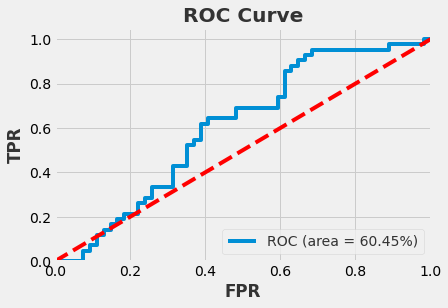

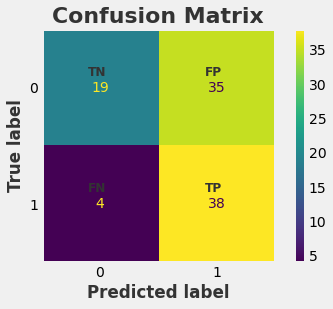

In [163]:
model_rfe = LogisticRegression()
trained_model_rfe_down, y_pred_lr_rfe_down, y_pred_proba_lr_rfe_down = model_creation(model_rfe, X_train_rfe_down, X_test_rfe_down, y_train_rfe_down)
roc_auc_lr_rfe_down, fpr_lr_rfe_down, tpr_lr_rfe_down = model_performance(y_test_rfe_down, y_pred_proba_lr_rfe_down)

plot_roc_curve(fpr_lr_rfe_down, tpr_lr_rfe_down, roc_auc_lr_rfe_down)

prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, specificity, cm = cal_score(y_test_rfe_down, y_pred_lr_rfe_down)
mean_acc, std_acc = calc_mean_std(model_rfe, X_train_rfe_down, y_train_rfe_down)
metrics = create_score_df(trained_model_rfe_down, X_train_rfe_down, y_train_rfe_down, X_test_rfe_down, y_test_rfe_down)

plot_confusion_matrix(metrics, trained_model_rfe_down)

In [164]:
# Add metrics to metrics_dict
metrics_dict['Downsampling Logistic Regression Model w RFE'] = metrics

#### 5. Class weight with Columns Selected with RFE Model Creation

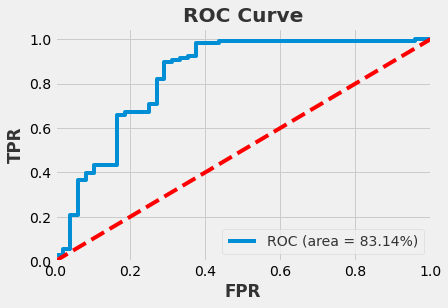

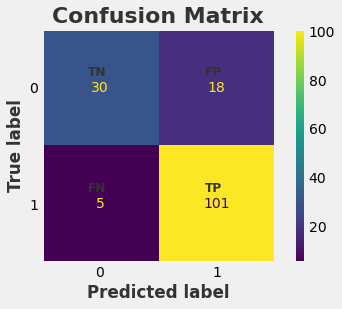

In [165]:
X_train_rfe_balanced, X_test_rfe_balanced, y_train_rfe_balanced, y_test_rfe_balanced = split_df(df_final, cols_selected_rfe, 'Loan_Status_bool')

model_rfe_balanced = LogisticRegression(class_weight='balanced')
trained_model_rfe_balanced, y_pred_lr_rfe_balanced, y_pred_proba_lr_rfe_balanced = model_creation(model_rfe_balanced, X_train_rfe_balanced, X_test_rfe_balanced, y_train_rfe_balanced)
roc_auc_lr_rfe_balanced, fpr_lr_rfe_balanced, tpr_lr_rfe_balanced = model_performance(y_test_rfe_balanced, y_pred_proba_lr_rfe_balanced)

plot_roc_curve(fpr_lr_rfe_balanced, tpr_lr_rfe_balanced, roc_auc_lr_rfe_balanced)

prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, specificity, cm = cal_score(y_test_rfe_balanced, y_pred_lr_rfe_balanced)
mean_acc, std_acc = calc_mean_std(model_rfe_balanced, X_train_rfe_balanced, y_train_rfe_balanced)
metrics = create_score_df(trained_model_rfe_balanced, X_train_rfe_balanced, y_train_rfe_balanced, X_test_rfe_balanced, y_test_rfe_balanced)

plot_confusion_matrix(metrics, trained_model_rfe_balanced)

In [166]:
# Add metrics to metrics_dict
metrics_dict['Balanced Logistic Regression Model w RFE'] = metrics

#### 6. Random Forest Classifier with Class weight and columns selected with RFE Model Creation

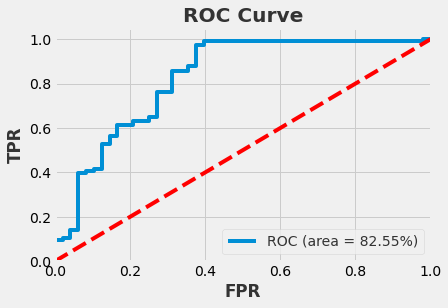

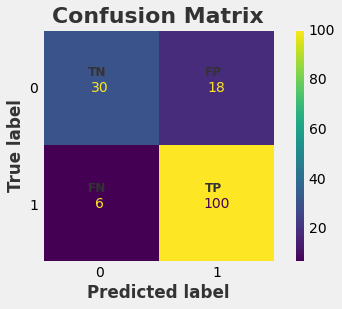

In [167]:
X_train_rfc_balanced, X_test_rfc_balanced, y_train_rfc_balanced, y_test_rfc_balanced = split_df(df_final, cols_selected_rfe, 'Loan_Status_bool')

model_rfc_balanced = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=200, 
                                      random_state=42, class_weight='balanced')
trained_model_rfc_balanced, y_pred_rfc_balanced, y_pred_proba_rfc_balanced = model_creation(model_rfc_balanced, X_train_rfc_balanced, X_test_rfc_balanced, y_train_rfc_balanced)
roc_auc_rfc_balanced, fpr_rfc_balanced, tpr_rfc_balanced = model_performance(y_test_rfc_balanced, y_pred_proba_rfc_balanced)

plot_roc_curve(fpr_rfc_balanced, tpr_rfc_balanced, roc_auc_rfc_balanced)

prec_scr_macro, prec_scr_micro, rec_scr_macro, rec_scr_micro, f1_scr_macro, f1_scr_micro, specificity, cm = cal_score(y_test_rfc_balanced, y_pred_rfc_balanced)
mean_acc, std_acc = calc_mean_std(model_rfc_balanced, X_train_rfc_balanced, y_train_rfc_balanced)
metrics = create_score_df(trained_model_rfc_balanced, X_train_rfc_balanced, y_train_rfc_balanced, X_test_rfc_balanced, y_test_rfc_balanced)

plot_confusion_matrix(metrics, trained_model_rfc_balanced)

In [168]:
# Add metrics to metrics_dict
metrics_dict['Balanced Random Forest Classifier Model w RFE'] = metrics

<h2><b>Model Performance</b></h2>
<a href="#Top"><h5>Top</h5></a>

In [169]:
cols_label = ['Mean Accuracy', 'Accuracy deviation', 'Precision Macro', 
                'Precision Micro', 'Recall Macro','Recall Micro', 'F1 Score Macro', 
                'F1 Score Micro', 'Specificity', 'Confusion Matrix']
metrics_df = pd.DataFrame(metrics_dict, index=cols_label)

In [170]:
metrics_df

,Logistic Regression Base Model,Logistic Regression Model w RFE Selection,Upsampling Logistic Regression Model w RFE,Downsampling Logistic Regression Model w RFE,Balanced Logistic Regression Model w RFE,Balanced Random Forest Classifier Model w RFE
Mean Accuracy,0.793,0.793,0.719,0.725,0.774,0.767
Accuracy deviation,0.028,0.028,0.076,0.049,0.037,0.033
Precision Macro,89.880952,89.880952,79.246183,67.331745,85.294118,84.039548
Precision Micro,85.714286,85.714286,77.251185,59.375,85.064935,84.415584
Recall Macro,77.653302,77.653302,77.553038,62.830688,78.891509,78.419811
Recall Micro,85.714286,85.714286,77.251185,59.375,85.064935,84.415584
F1 Score Macro,80.784936,80.784936,76.977632,57.718803,81.033467,80.357143
F1 Score Micro,85.714286,85.714286,77.251185,59.375,85.064935,84.415584
Specificity,56.0,56.0,65.0,35.0,62.0,62.0
Confusion Matrix,"[[27, 21], [1, 105]]","[[27, 21], [1, 105]]","[[70, 38], [10, 93]]","[[19, 35], [4, 38]]","[[30, 18], [5, 101]]","[[30, 18], [6, 100]]"


<h2><b>Conclusion</b></h2>

* Interestingly, the performance of the base logistic regression model and hyperparameter tuend logistic regression model with RFE selected features is very similar</br>
* AUC of both models are 83.1% and 82.98% respectively</br>
* The mean accuracy, accuracy deviation, precision macro, precision micro, recall macro, recall micro, F1 score macro, F1 score micro and confusion matrix of the both models show the same values</br>
* Balanced logistic regression model with RFE selected feature's AUC is the highest of 83.14%</br>
* Considering the nature of the business problem, it is more important to avoid accepting non-qualified applicants rathar than rejecting qualified applicants. Therefore, Balanced logistic regression model with RFE selected feature could be the best model</br>
* This model predicted 119 candidates approved. 18 out of 119 are falsly labeled positive</br>
* Overall, this model has a good score of specificity, precision, recall and f1 score</br>
* Downsampling model is the worst. The reason could be the size of the observation. The downsampled dataset has only 192 observations.
<a href="#Top"><h5>Top</h5></a>